In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
response ={
"pred":"{'abstract': 0.09656394, 'color_field_painting': 2.3259385e-05, 'cubism': 0.00038009233, 'expressionism': 0.7018598, 'impressionism': 0.006471214, 'realism': 0.0673626, 'renaissance': 0.11695008, 'romanticism': 0.010389085}"
}
data = response['pred']
data

"{'abstract': 0.09656394, 'color_field_painting': 2.3259385e-05, 'cubism': 0.00038009233, 'expressionism': 0.7018598, 'impressionism': 0.006471214, 'realism': 0.0673626, 'renaissance': 0.11695008, 'romanticism': 0.010389085}"

In [49]:
data = eval(data)
data

{'abstract': 0.09656394,
 'color_field_painting': 2.3259385e-05,
 'cubism': 0.00038009233,
 'expressionism': 0.7018598,
 'impressionism': 0.006471214,
 'realism': 0.0673626,
 'renaissance': 0.11695008,
 'romanticism': 0.010389085}

In [50]:
type(data)

dict

In [56]:
df = pd.DataFrame(list(data.items()),columns = ['Movement','Value of prediction']) 
df

,Movement,Value of prediction
0,abstract,0.096564
1,color_field_painting,0.000023
2,cubism,0.000380
3,expressionism,0.701860
4,impressionism,0.006471
5,realism,0.067363
6,renaissance,0.116950
7,romanticism,0.010389


In [60]:
df.set_index("Movement")

,Value of prediction
Movement,
abstract,0.096564
color_field_painting,0.000023
cubism,0.000380
expressionism,0.701860
impressionism,0.006471
realism,0.067363
renaissance,0.116950
romanticism,0.010389


<AxesSubplot:xlabel='Value of prediction', ylabel='Movement'>

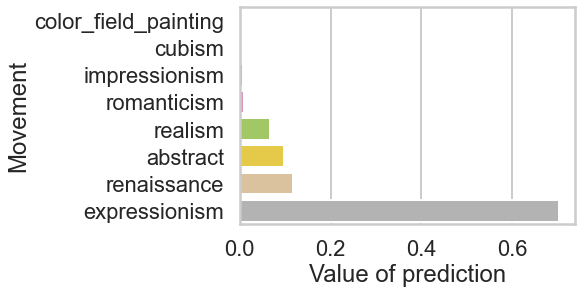

In [73]:
sns.set_theme(style='whitegrid',palette='Set2',context='poster')
sns.barplot(data=df,y='Movement',x='Value of prediction', order =df.sort_values("Value of prediction",ascending='False').Movement)

In [39]:
threshold = 0.01

In [40]:
data = {i:j for i,j in data.items() if j>threshold}

In [41]:
data.values()

dict_values([0.09656394, 0.7018598, 0.0673626, 0.11695008, 0.010389085])

In [42]:
data['others'] = 1 - sum(data.values())

In [43]:
data

{'abstract': 0.09656394,
 'expressionism': 0.7018598,
 'realism': 0.0673626,
 'renaissance': 0.11695008,
 'romanticism': 0.010389085,
 'others': 0.006874494999999925}

In [44]:
len(data.values())

6

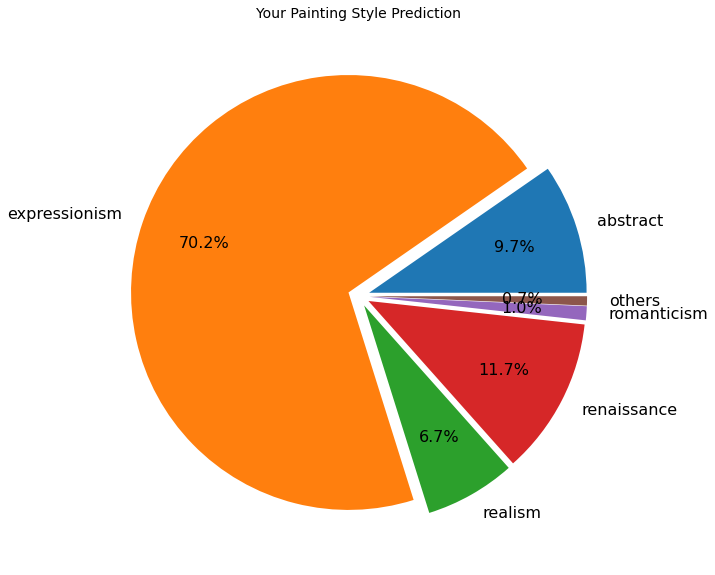

In [45]:
pie, ax = plt.subplots(figsize=[10,10])
labels = data.keys()
plt.pie(x=data.values(), autopct="%.1f%%",explode=[0.05]*len(data.values()), labels=labels, pctdistance=0.7,textprops = {'fontsize': 16},)
plt.title("Your Painting Style Prediction", fontsize=14);